In [17]:
# Figure 1C: % FBE.
import pandas, importlib
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import countsColumnsNaming
import vennMaker
import peaksList
import heatmap
import utils



In [18]:
exl = pandas.ExcelFile('../v2/tables/Table S1 Peaks.xls')

dfs = {}

for sheet_name in exl.sheet_names:
    print(sheet_name)
    dfs[sheet_name] = pandas.read_excel(exl, sheet_name)

SP FBF (25°C)
SP FBF-2 (25°C)
SP FBF-1 (25°C)
OO FBF-2 (20°C)
OO FBF (25°C)
OO FBF-1 (20°C)
OO FBF-2 (25°C)
OO FBF-1 (25°C)


OO FBF-1 (20°C)
(2584, 19)
0.7008513931888545
0.86
OO FBF-2 (20°C)
(2150, 19)
0.6893023255813954
0.794
OO FBF (25°C)
(1817, 18)
0.7055586130985141
0.91
SP FBF (25°C)
(1991, 18)
0.6916122551481667
0.92
                     Name  With FBE
0         OO FBF-1 (20°C)  0.700851
1  OO FBF-1 (20°C) top500  0.860000
2         OO FBF-2 (20°C)  0.689302
3  OO FBF-2 (20°C) top500  0.794000
4           OO FBF (25°C)  0.705559
5    OO FBF (25°C) top500  0.910000
6           SP FBF (25°C)  0.691612
7    SP FBF (25°C) top500  0.920000


/Users/dfporter/pma/venv/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


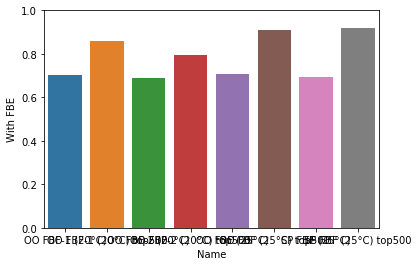

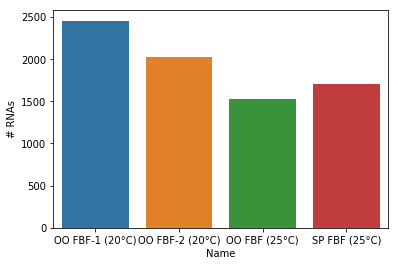

'\nOO FBF-1 (20°C)\n(2364, 18)\n0.6307106598984772\n0.922\nOO FBF-2 (20°C)\n(2835, 18)\n0.6345679012345679\n0.926\nOO FBF (25°C)\n(2139, 18)\n0.6680691912108462\n0.886\nSP FBF (25°C)\n(2131, 18)\n0.7419052088221493\n0.9'

In [19]:
def top_n_genes(df, n_genes=500):
    _df = df.drop_duplicates(subset='Gene name')
    _df.head(n_genes)
    return _df


order = ['OO FBF-1 (20°C)', 'OO FBF-2 (20°C)', 'OO FBF (25°C)', 'SP FBF (25°C)']
order_exp = [
    'OO FBF-1 (25°C)', 'OO FBF-1 (25°C) top 500', 
    'OO FBF-2 (25°C)', 'OO FBF-2 (25°C) top 500', 
    'OO FBF (25°C)', 'OO FBF (25°C) top 500', 
    'SP FBF (25°C)', 'SP FBF (25°C) top 500',
]
def figure1C(dfs):
    perc_fbe = []
    for sheet_name in order:
        df = dfs[sheet_name]
        print(sheet_name)
    #    print(df.columns)
        print(df.shape)
        print(df['Has UGUNNNAU (FBE)?'].sum()/df.shape[0])
        perc_fbe.append(
            {'Name': sheet_name, 'With FBE': df['Has UGUNNNAU (FBE)?'].sum()/df.shape[0]})
        top = df.head(500)
        perc_fbe.append(
            {'Name': sheet_name + ' top500', 'With FBE': top['Has UGUNNNAU (FBE)?'].sum()/top.shape[0]})
        print(top['Has UGUNNNAU (FBE)?'].sum()/top.shape[0])

    flat = pandas.DataFrame(perc_fbe)
    print(flat)

    fig = plt.figure()
    sns.barplot(data=flat, x='Name', y='With FBE')
    plt.ylim(0, 1)
    plt.savefig('../v2/figs/Figure1A_barplot_FBE.pdf')
    plt.show()
    plt.clf()
    plt.close()

figure1C(dfs)

def figure1E(dfs):
    flat = []
    for sheet_name in order:
        df = dfs[sheet_name]
        _df = df.drop_duplicates(subset='Gene name')
        flat.append(
            {'Name': sheet_name, '# RNAs': _df.shape[0]}
        )
    
    flat = pandas.DataFrame(flat)
    
    fig = plt.figure()
    sns.barplot(data=flat, x='Name', y='# RNAs')
    plt.savefig('../v2/figs/Figure1E_barplot_num_RNAs.pdf')
    plt.show()
    plt.clf()
    plt.close()
    
figure1E(dfs)

'''
OO FBF-1 (20°C)
(2364, 18)
0.6307106598984772
0.922
OO FBF-2 (20°C)
(2835, 18)
0.6345679012345679
0.926
OO FBF (25°C)
(2139, 18)
0.6680691912108462
0.886
SP FBF (25°C)
(2131, 18)
0.7419052088221493
0.9'''

In [5]:
import os
os.getcwd()

'/Users/dfporter/Desktop/macbook_air_Desktop/shared/sp_oo/FBF_gendered_gl/cliputil'